1. Import required packages.
2. Load the data file


3 pts.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [30]:
from google.colab import files
uploaded = files.upload()

import io
diamonds = pd.read_csv('/content/diamonds_train.csv')

Saving diamonds_train.csv to diamonds_train (1).csv


4. Check the first 5 rows of data
5. Check for missing values.
6. Check data distribution by diamond shape using a histogram (bar graph).


2 pts.



In [32]:
diamonds.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


<Axes: >

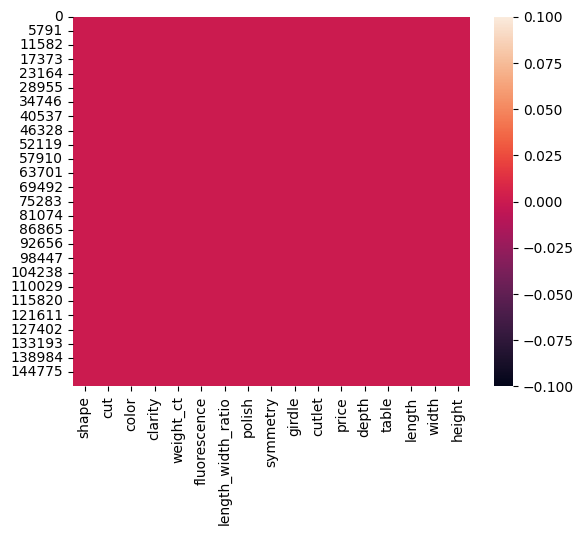

In [33]:
sns.heatmap(diamonds.isnull(), cbar=True)

In [34]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150546 entries, 0 to 150545
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shape               150546 non-null  object 
 1   cut                 150546 non-null  object 
 2   color               150546 non-null  object 
 3   clarity             150546 non-null  object 
 4   weight_ct           150546 non-null  float64
 5   fluorescence        150546 non-null  object 
 6   length_width_ratio  150546 non-null  float64
 7   polish              150546 non-null  object 
 8   symmetry            150546 non-null  object 
 9   girdle              150546 non-null  object 
 10  cutlet              150546 non-null  object 
 11  price               150546 non-null  int64  
 12  depth               150546 non-null  float64
 13  table               150546 non-null  float64
 14  length              150546 non-null  float64
 15  width               150546 non-nul

<Axes: >

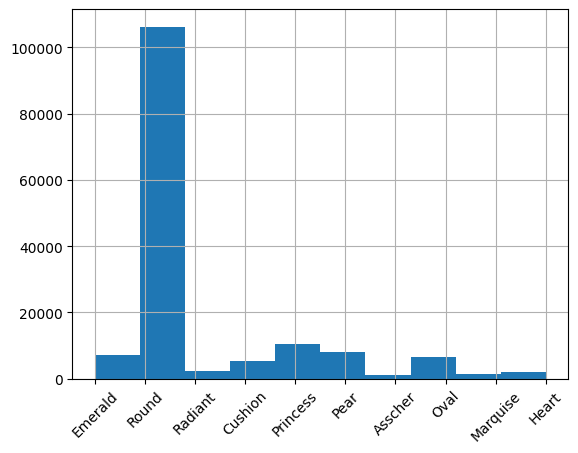

In [35]:
diamonds['shape'].hist(xrot=45.0)

In [36]:
diamond_shapes_removed = ['Emerald', 'Radiant', 'Cushion','Princess','Pear','Asscher','Oval','Marquise','Heart']
diamonds.drop(diamonds[diamonds['shape'].isin(diamond_shapes_removed)].index, inplace=True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

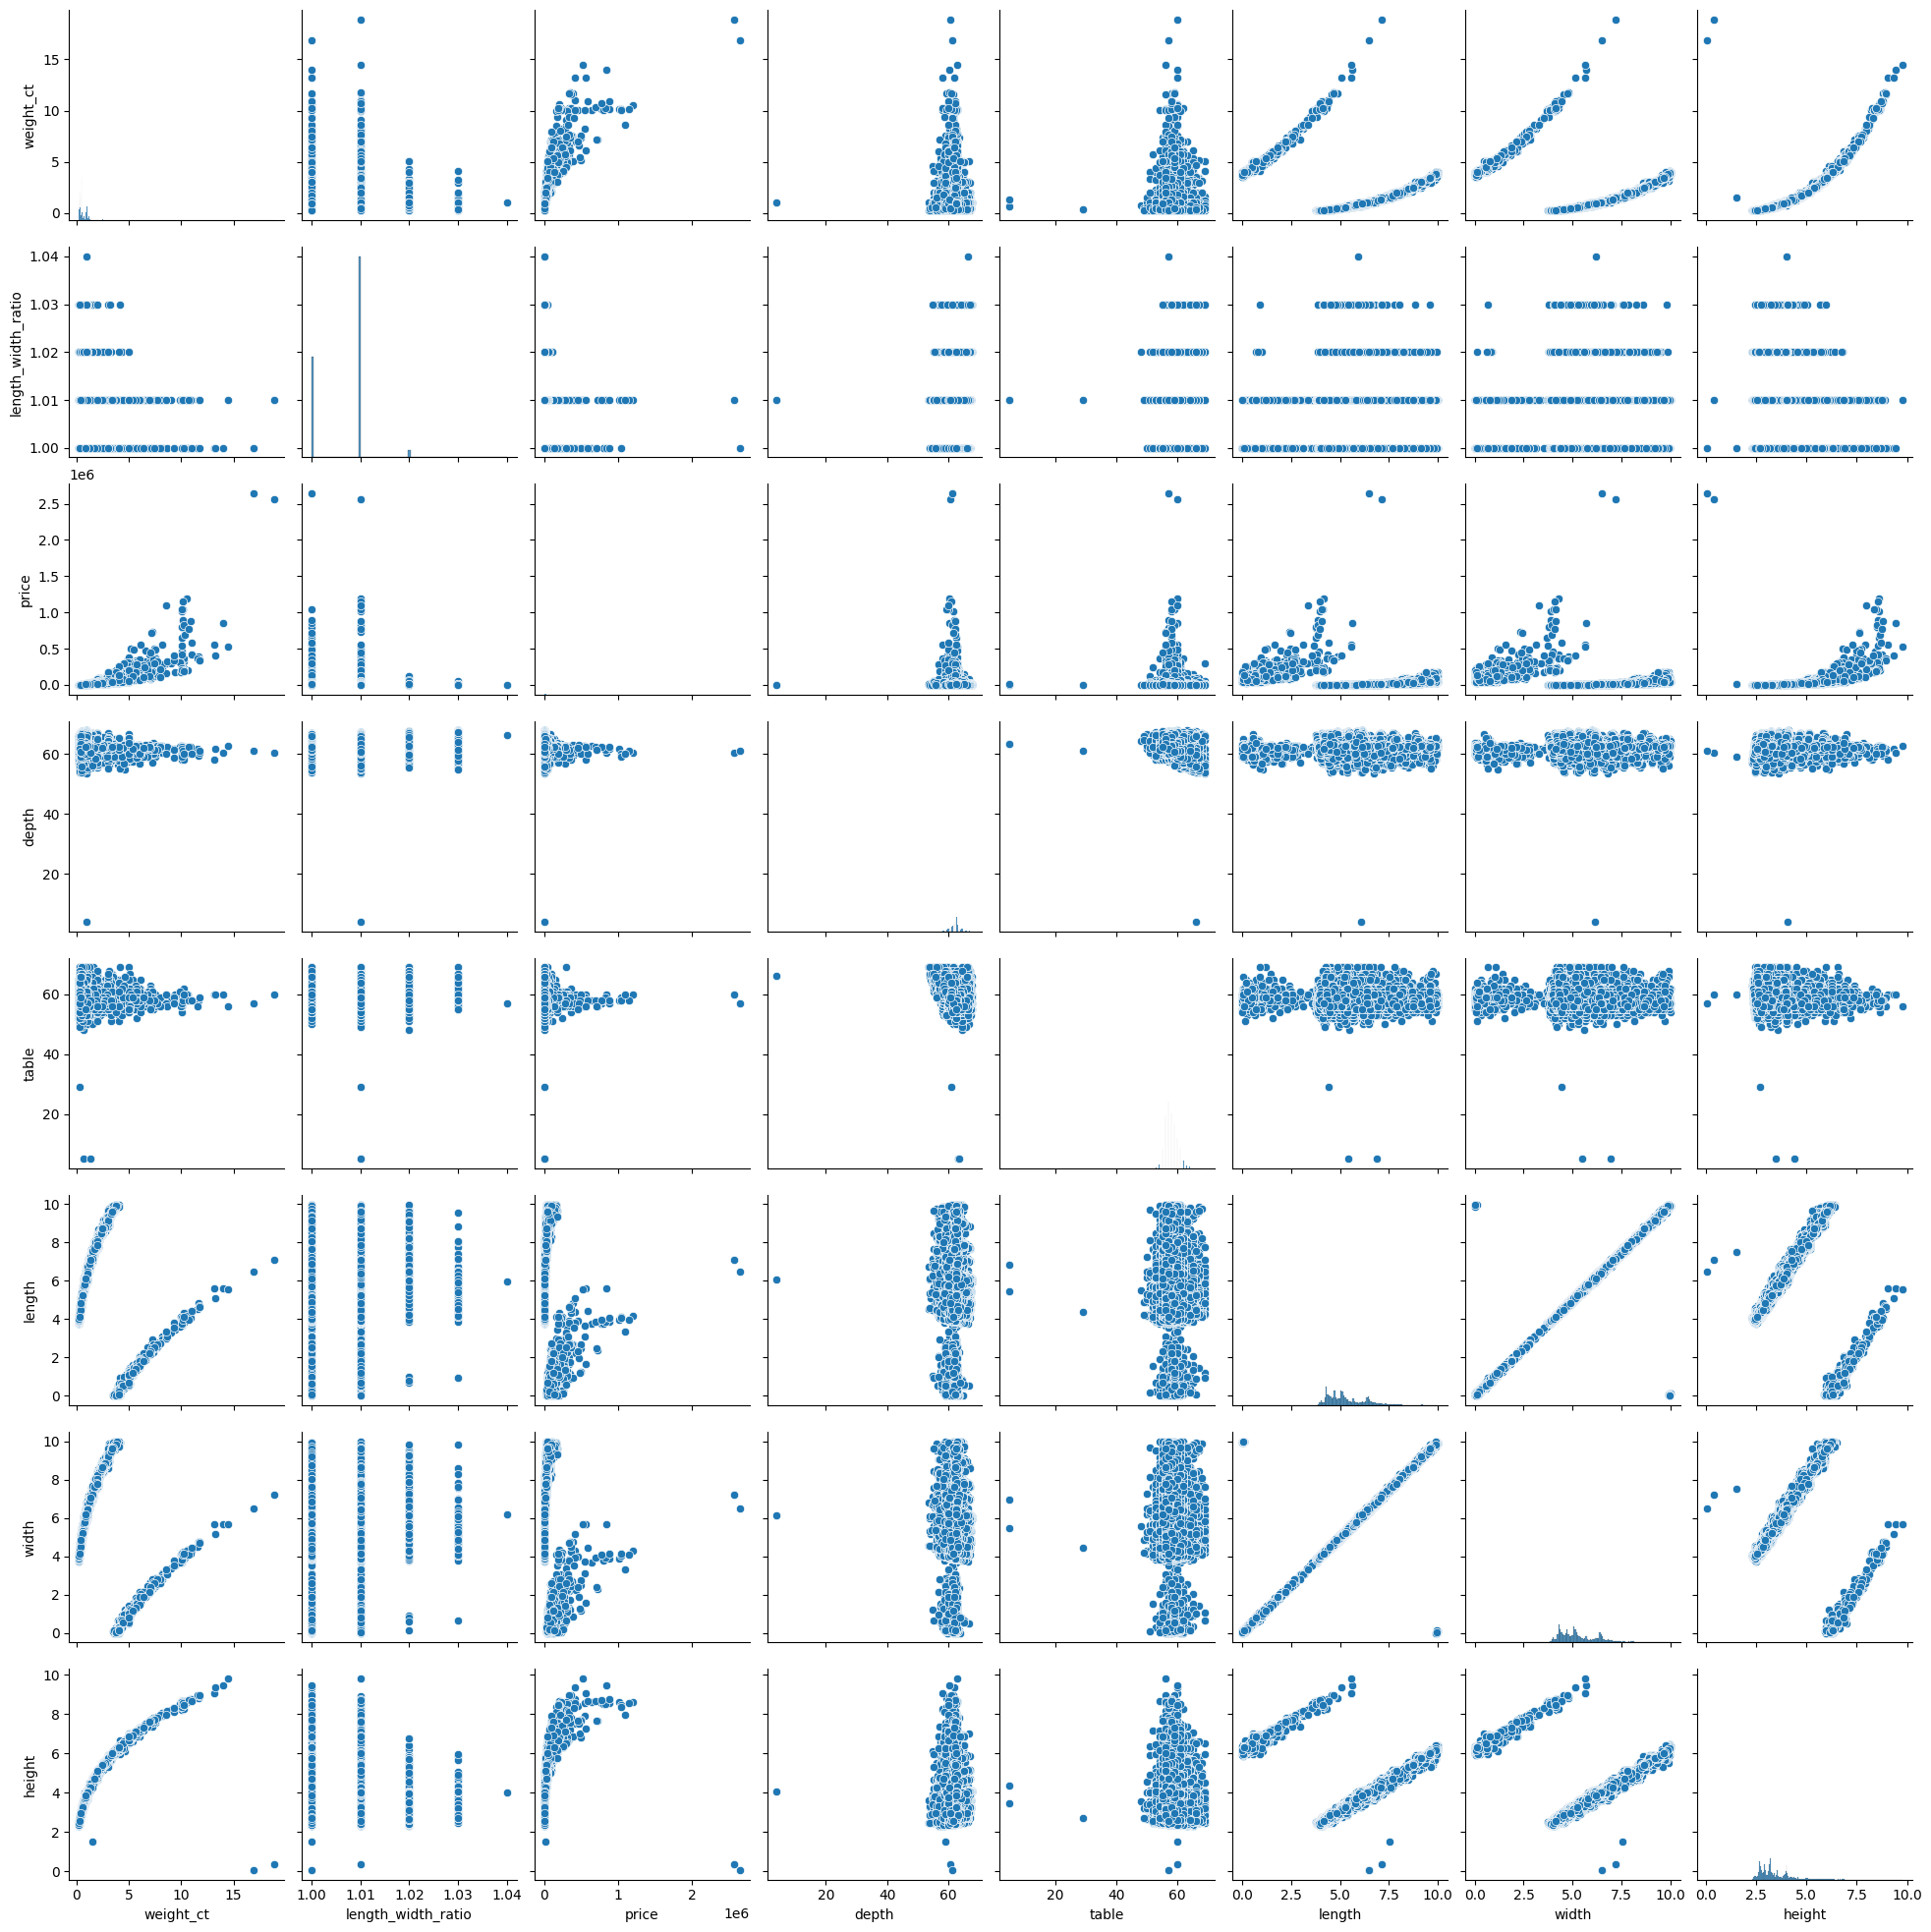

In [39]:
sns.pairplot(diamonds)

Comments:
1. Some of the predictors such as Height, width, length and weight_ct show a clear linear relationship between themselves and the target variable.
2. The images do not show homoscedasticity as they tend to have more variance as the graph goes on when talking about price. Other relationships show clear homoscedascticity such as height and weight_ct or length and width.
3. There is a decent amount of outliers that need to be cleaned up such as prices over $2000000, height below 1, weight over 15 and table and depth below 40.


9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [9]:
diamonds.columns

Index(['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 'price',
       'depth', 'table', 'length', 'width', 'height'],
      dtype='object')

In [49]:
diamonds.drop(diamonds[diamonds['price'] > 2000000].index, inplace=True)
diamonds.drop(diamonds[diamonds['weight_ct'] > 15].index, inplace=True)
diamonds.drop(diamonds[diamonds['table'] < 40].index, inplace=True)
diamonds.drop(diamonds[diamonds['depth'] < 40].index, inplace=True)
diamonds.drop(diamonds[diamonds['height'] < 2].index, inplace=True)


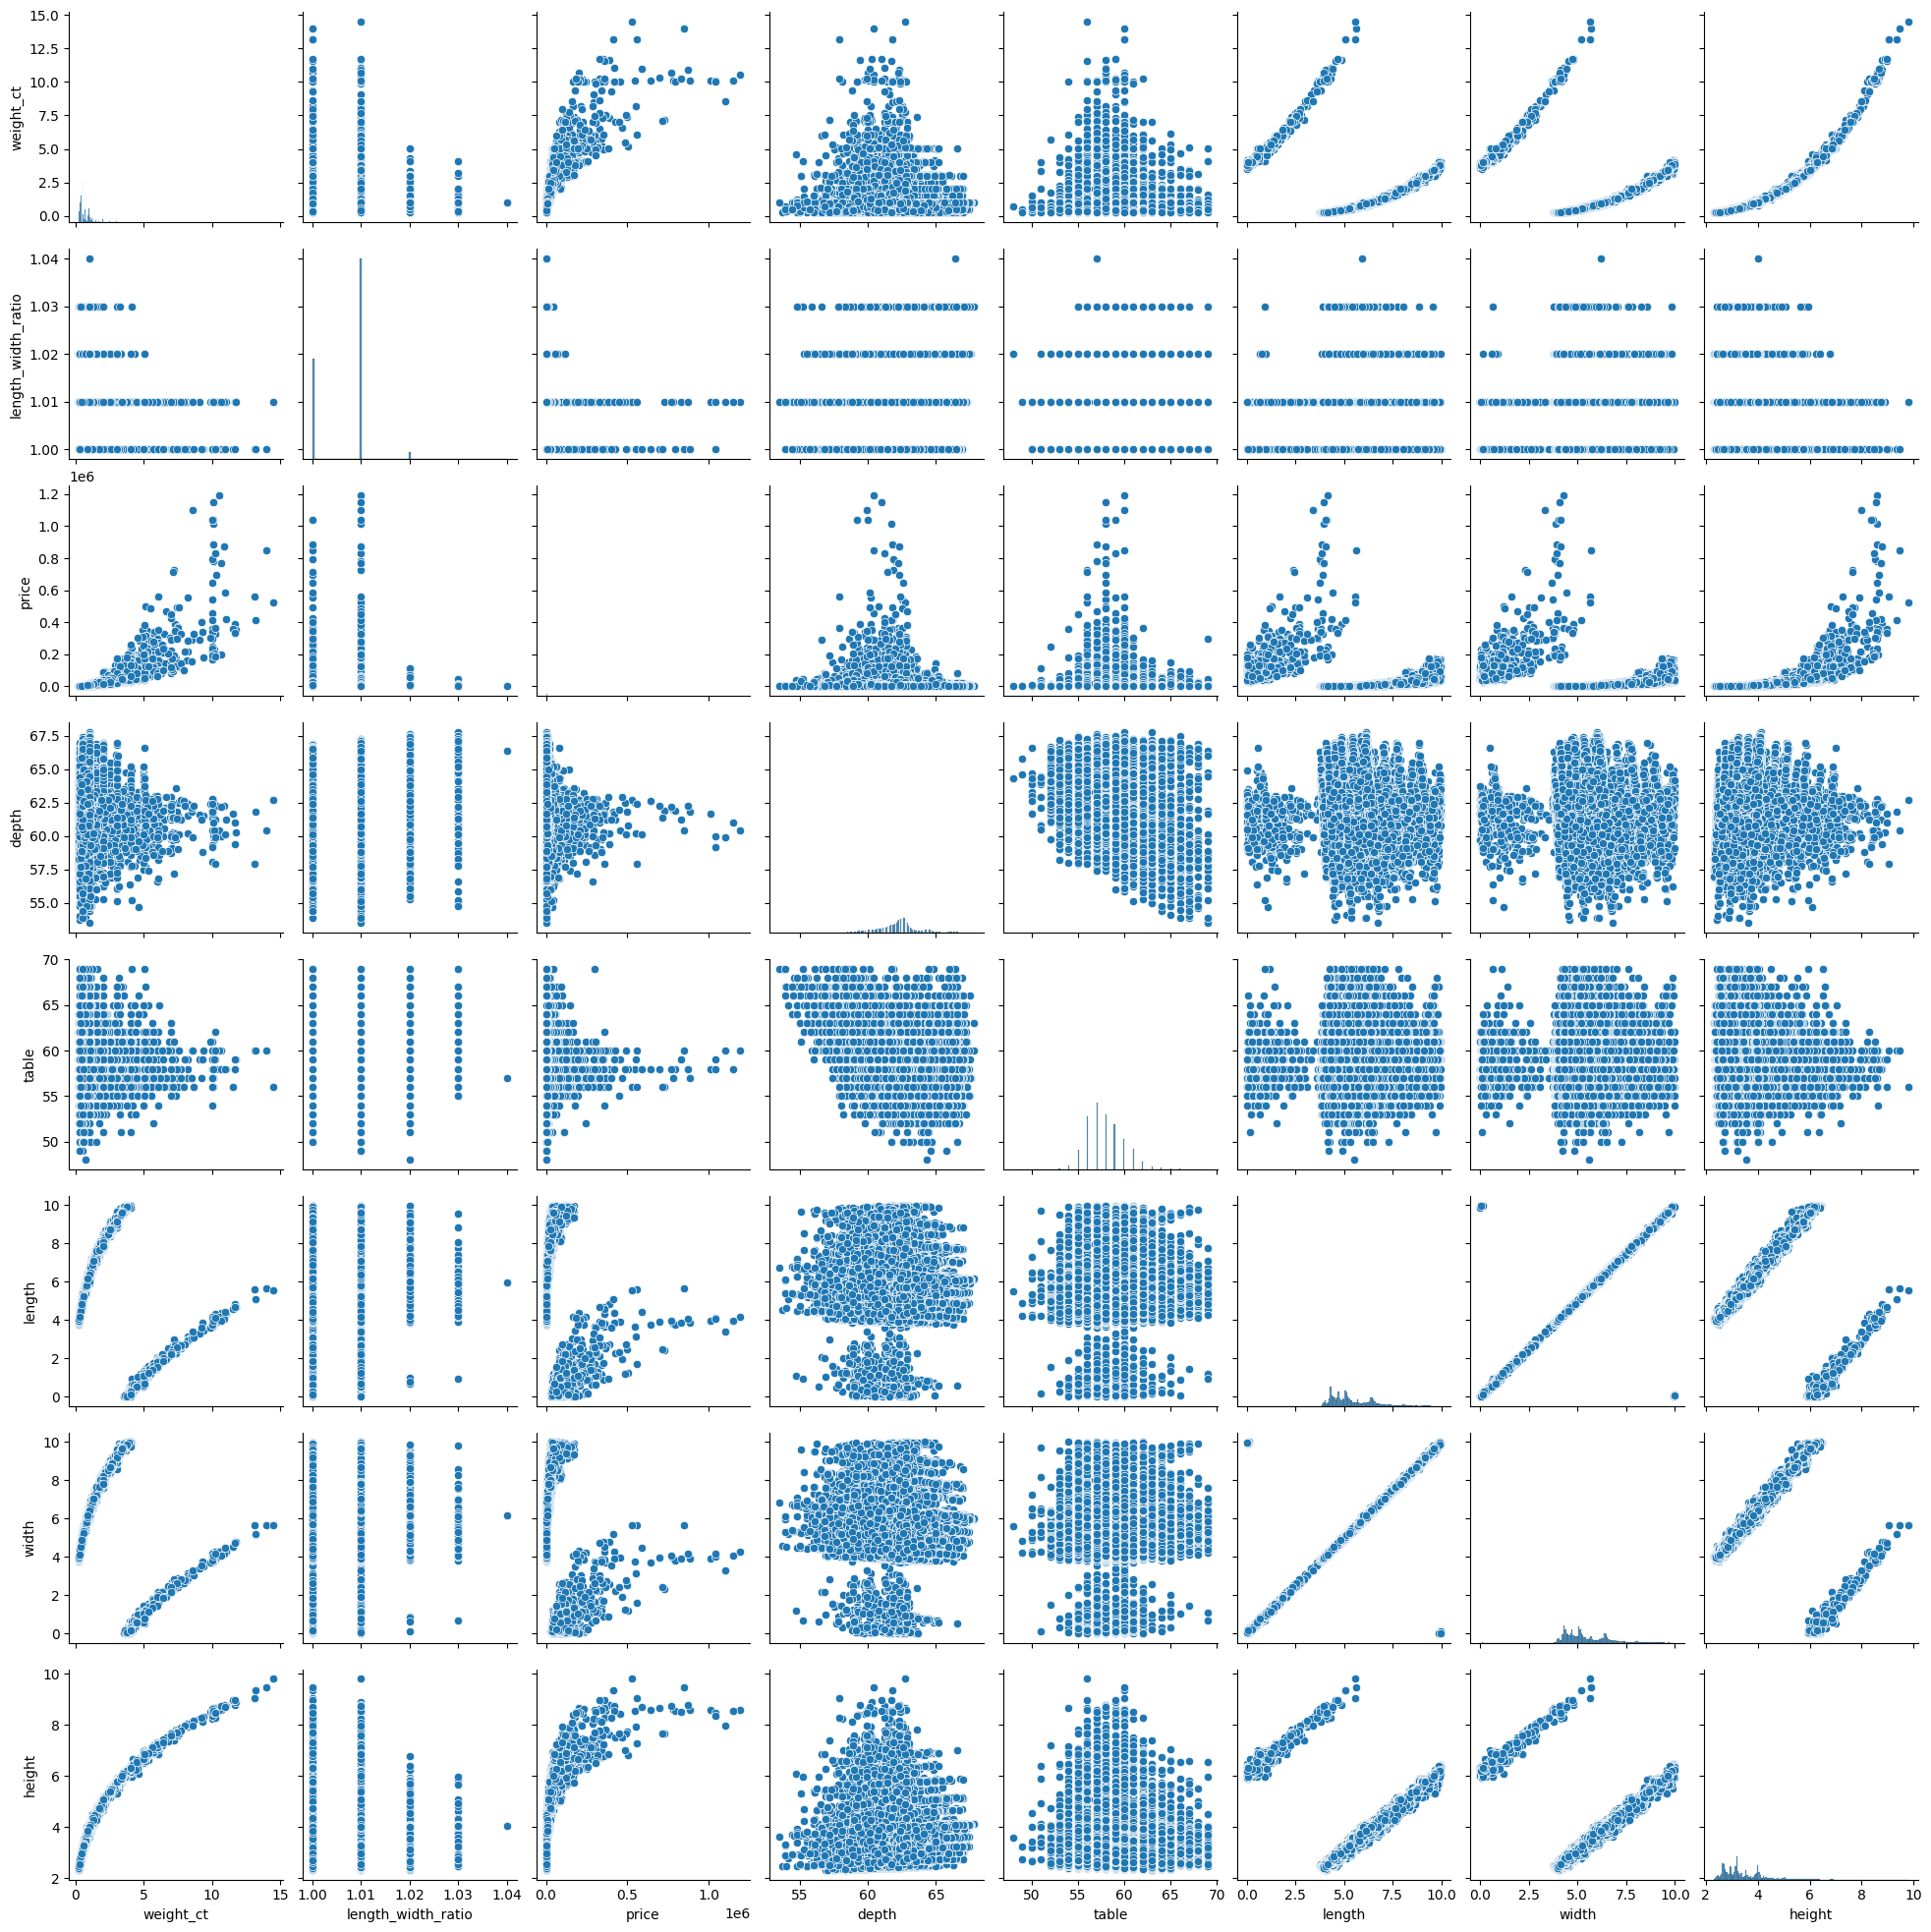

In [50]:
sns.pairplot(diamonds)

11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict price for round diamonds.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

8 pts.

In [113]:
diamonds.columns

Index(['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 'price',
       'depth', 'table', 'length', 'width', 'height'],
      dtype='object')

In [114]:
predictors = ['weight_ct', 'length_width_ratio', 'depth', 'table', 'length', 'width', 'height']


In [115]:
X = pd.get_dummies(diamonds[predictors], drop_first=True)
y = diamonds['price']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [116]:
diamond_prices = LinearRegression()

diamond_prices.fit(train_X, train_y)

LinearRegression()

In [117]:
diamond_prices.intercept_

22066.495970071064

In [118]:
diamond_prices.coef_

array([ 49873.51363174,  12286.45214208,    577.15339011,   -228.35787155,
         -597.74919685,    410.17554759, -25743.2064712 ])

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [120]:
pred_y = diamond_prices.predict(valid_X)

In [121]:
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

R2:  0.7112380877147819
MAE:  2853.782211182722
RMSE:  10424.711995317892
Max error:  810845.8390209434


**Q14 Answer**
I think this model could be used for a casual buyer and maybe somone who is interested in purchasing a ring once and not again. However, I think it leaves some to be desired if it were to be used by a professional who might buy and sell diamonds or someone who is going to be a repeat customer. The R2 score of .71 is decent but not accurate enough to be super consistent. Furthermore, the MAE and RMSE being so different suggest there may be some outliers that aren't as visible in the dataset and could be harmful for practicioners.

15. Use the model to predict prices in the diamond_score.csv dataset
16. Compare predicted and actual prices for the diamonds in the diamond_score.csv dataset

10 pts.

In [76]:
from google.colab import files
uploaded = files.upload()

import io
diamonds_actual = pd.read_csv('/content/diamonds_score.csv')

Saving diamonds_score.csv to diamonds_score (2).csv


In [146]:
diamonds_actual.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Round,Ideal,G,VVS1,0.58,FaintInfo,1.01,Excellent,Excellent,Thin to Medium,None,2311,62.4,56,5.31,5.34,3.32
1,Round,Ideal,J,SI1,1.00,NoneInfo,1.01,Very Good,Very Good,Medium to Slightly Thick,Medium,3985,61.8,61,6.35,6.40,3.94
2,Round,Very Good,F,VVS2,0.90,NoneInfo,1.02,Excellent,Very Good,Medium to Slightly Thick,None,5935,64.3,56,6.12,6.02,3.90
3,Round,Ideal,H,VS1,0.30,NoneInfo,1.01,Excellent,Very Good,Medium to Slightly Thick,None,578,62.2,56,4.30,4.26,2.66
4,Round,Very Good,I,VS2,1.51,NoneInfo,1.24,Excellent,Excellent,Slightly Thick to Thick,None,7195,69.4,67,7.20,5.79,4.02


In [147]:
diamonds_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shape               10 non-null     object 
 1   cut                 10 non-null     object 
 2   color               10 non-null     object 
 3   clarity             10 non-null     object 
 4   weight_ct           10 non-null     float64
 5   fluorescence        10 non-null     object 
 6   length_width_ratio  10 non-null     float64
 7   polish              10 non-null     object 
 8   symmetry            10 non-null     object 
 9   girdle              10 non-null     object 
 10  cutlet              10 non-null     object 
 11  price               10 non-null     int64  
 12  depth               10 non-null     float64
 13  table               10 non-null     int64  
 14  length              10 non-null     float64
 15  width               10 non-null     float64
 16  height     

In [178]:
score_predictors = ['weight_ct', 'length_width_ratio', 'depth', 'table', 'length', 'width', 'height']

In [179]:
selected_predictors=diamonds_actual[score_predictors]

In [182]:
prediction=diamond_prices.predict(selected_predictors)

In [183]:
xx = prediction
yy= diamonds_actual['price']

In [186]:
print('R2: ', r2_score(yy, xx))
print('MAE: ', mean_absolute_error(yy, xx))
print('RMSE: ', math.sqrt(mean_squared_error(yy, xx)))
print('Max error: ', max_error(yy, xx))

R2:  -6.105981204373098
MAE:  4737.29111531841
RMSE:  8277.6021779334
Max error:  24753.6022790132


The model does a very poor job of predicting prices for the new dataset. It has an egregious R2 Score and was making errors that were larger than any of the prices in the second dataset. I tried many adjustments but couldn't tell if/where something was wrong with my model. If you could point out where i might've made an error I would appreciate it because i thought I removed outliers and trained correctly but the model is still extremely different in the training set in comparison to the score set.